In [20]:
#Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from qutip import (basis, mesolve, sigmax, sigmaz, qeye,Qobj)
from scipy import signal

In [2]:
 #Implementation of the system described in the Phase 2 report.
def Simulate(energy_gap , light_frequency, light_intensity, timespan, points):
    ground = basis(2, 0)  # ground state
    excite = basis(2, 1)  # excited state

    H0 =  - energy_gap * sigmaz()
    def component(t,args):
        return light_intensity(t,args) * np.exp( 1j *light_frequency * t)
    def componentbar(t,args):
        return light_intensity(t,args) * np.exp( -1j *light_frequency * t)
    TR = Qobj(np.array([[0,1],[0,0]]))
    BL = Qobj(np.array([[0,0],[1,0]]))
    H_drivetop = [TR , componentbar]
    H_drivebottom = [BL , component]

    H = [H0, H_drivetop,H_drivebottom] # Constructed Hamiltonian
    
    # Paramaters for mesolve
    c_ops = []   
    e_ops = [ground*ground.dag(), excite*excite.dag()]
    
    psi0 = ground
    args = {}

    # The simulation is run by calling mesolve
    tlist = np.linspace(0, timespan, points)
    result = mesolve(H, psi0, tlist, c_ops, e_ops, args=args)

    return result.expect[1]   


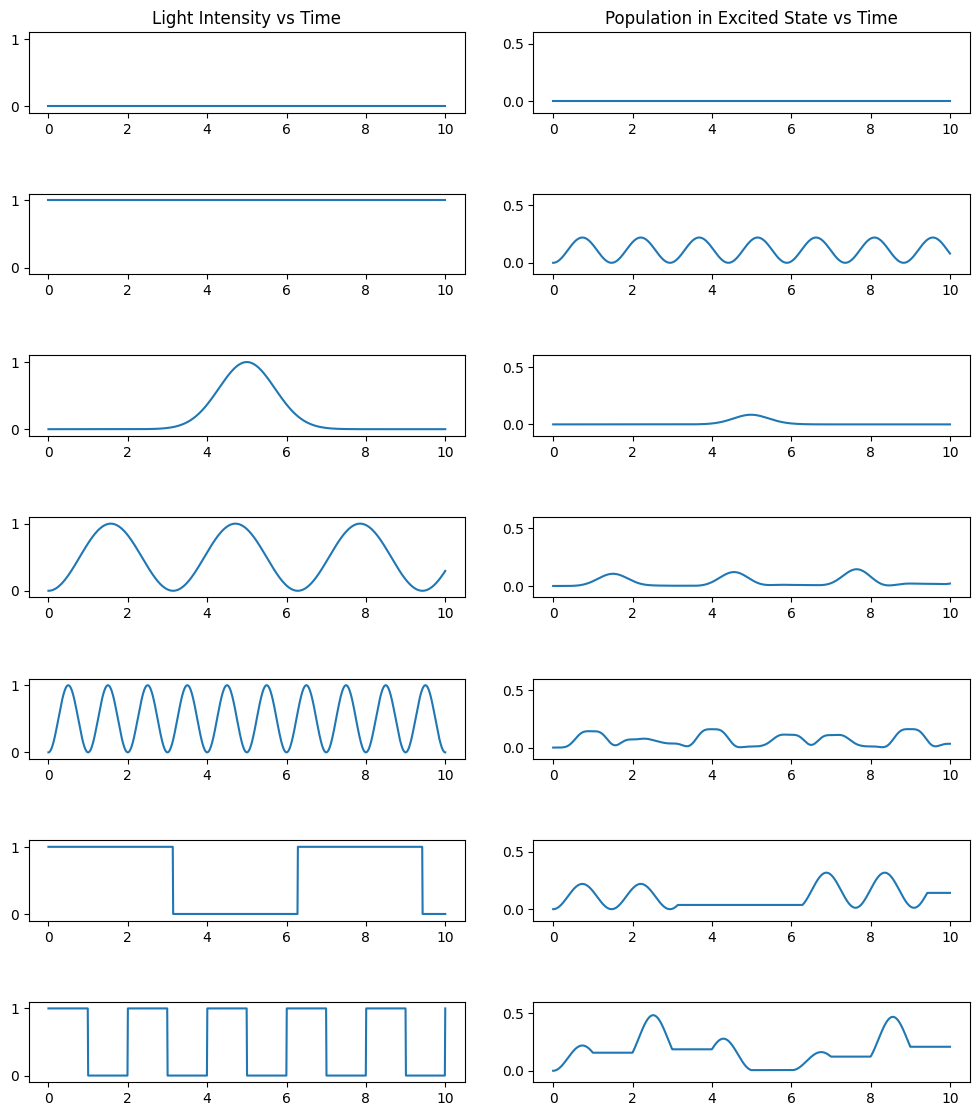

In [25]:
figure, axis = plt.subplots(7,2 )

tlist = np.linspace(0, 10,1000)


# 0

f=lambda t,args : t*1-t

axis[0, 0].plot(tlist, f(tlist, 0))
axis[0, 0].set_title("Light Intensity vs Time")
axis[0,0].set_ylim([-0.1,1.1])

axis[0, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[0, 1].set_title("Population in Excited State vs Time")
axis[0,1].set_ylim([-0.1,0.6])

# Constant

f=lambda t,args : t*1-t+1

axis[1, 0].plot(tlist, f(tlist, 0))
axis[1,0].set_ylim([-0.1,1.1])

axis[1, 1].plot(tlist,Simulate(1.1,np.pi/2, f , 10, 1000))
axis[1,1].set_ylim([-0.1,0.6])

# bump function
f=lambda t,args : np.exp(-(t-5)**2)

axis[2, 0].plot(tlist, f(tlist, 0))
axis[2,0].set_ylim([-0.1,1.1])

axis[2, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[2,1].set_ylim([-0.1,0.6])

# sin^2 low frequency

f=lambda t,args : np.sin(t)**2

axis[3, 0].plot(tlist, f(tlist, 0))
axis[3,0].set_ylim([-0.1,1.1])

axis[3, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[3,1].set_ylim([-0.1,0.6])

# sin^2 high frequency

f=lambda t,args : np.sin(t*np.pi)**2

axis[4, 0].plot(tlist, f(tlist, 0))
axis[4,0].set_ylim([-0.1,1.1])

axis[4, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[4,1].set_ylim([-0.1,0.6])

# square wave low frequency
f=lambda t,args : signal.square(t)/2+0.5

axis[5, 0].plot(tlist, f(tlist, 0))
axis[5,0].set_ylim([-0.1,1.1])

axis[5, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[5,1].set_ylim([-0.1,0.6])


# square wave high frequency
f=lambda t,args : signal.square(t*np.pi)/2+0.5

axis[6, 0].plot(tlist, f(tlist, 0))
axis[6,0].set_ylim([-0.1,1.1])

axis[6, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[6,1].set_ylim([-0.1,0.6])

figure.tight_layout(pad=0.5)
figure.set_figwidth(10)
figure.set_figheight(12)